<a href="https://colab.research.google.com/github/Anoopkumar1996/Data-Science-Projects/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


In [3]:
df = pd.read_csv('train-chennai-sale.csv')

#Checking for Missing Values

In [4]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Missing Values are present in *N_BEDROOM*, *N_BATHROOM*, *QS_OVERALL* Coloumns

#Checking the Datatypes of Coloumns

In [5]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

#Filling in the missing values and converting N_BEDROOM AND N_BATHROOM to int datatype

In [6]:
df = df.fillna({"N_BEDROOM": df["N_BEDROOM"].mode()[0],
           "N_BATHROOM": df["N_BATHROOM"].mode()[0], 
           "QS_OVERALL": df["QS_OVERALL"].mean()})

In [7]:
df['N_BEDROOM']= df['N_BEDROOM'].astype(int)
df['N_BATHROOM']= df['N_BATHROOM'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int64  
 6   N_BATHROOM     7109 non-null   int64  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#Changing DateTime Values into DateTime Objects

In [9]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

#Adding a new coloumn called BUILDING_AGE

In [10]:
df["BUILDING_AGE"]=df['DATE_SALE']-df['DATE_BUILD']
df.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,BUILDING_AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031 days
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015 days
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152 days
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030 days
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802 days


Converting Building age to Years

In [11]:
df["BUILDING_AGE"]=(df.BUILDING_AGE)/np.timedelta64(1,'Y')


Converting Building age datatype to int

In [12]:
df['BUILDING_AGE']= df['BUILDING_AGE'].astype(int)

In [13]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,BUILDING_AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29


#Checking the columns and dropping the irrelevent columns


In [14]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

In [15]:
df.drop(columns=['PRT_ID','REG_FEE','COMMIS','DATE_SALE','DATE_BUILD'],inplace=True)

In [16]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

#Exploring Categorical data

In [17]:
df1=df.select_dtypes(include=['object'])
print(f"No.of Categorical columns = {df1.shape[1]}")
print(list(df1.columns))

No.of Categorical columns = 7
['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


Checking for no of occurrences in AREA Column

In [18]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

Correcting the spelling Mistakes

In [19]:
df['AREA'].replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet"},inplace = True)
df['AREA'].replace({"Karapakam":"Karapakkam"},inplace = True)
df['AREA'].replace({"KKNagar":"KK Nagar"},inplace=True)
df['AREA'].replace({"Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar"},inplace=True)
df['AREA'].replace({"Velchery":"Velachery"},inplace=True)
df['AREA'].replace({"Adyr":"Adyar"},inplace=True)
df['AREA'].replace({"TNagar":"Adyar"},inplace=True)

In [20]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          779
T Nagar        496
Name: AREA, dtype: int64

Checking for no of occurrences in SALE_COND Column

In [21]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

Correcting the spelling Mistakes

In [22]:
df['SALE_COND'].replace({"Adj Land":"AdjLand"},inplace=True)
df['SALE_COND'].replace({"Ab Normal":"AbNormal"},inplace=True)
df['SALE_COND'].replace({"PartiaLl":"Partial","Partiall":"Partial"},inplace=True)

In [23]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

Checking for no of occurrences in PARK_FACIL Column

In [24]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

Correcting the spelling Mistakes

In [25]:
df['PARK_FACIL'].replace({"Noo":"No"},inplace=True)

In [26]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

Checking for no of occurrences in BUILDTYPE Column



In [27]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

Correcting the spelling Mistakes

In [28]:
df['BUILDTYPE'].replace({"Others":"Other","Comercial":"Commercial"},inplace=True)

In [29]:
df.BUILDTYPE.value_counts()

House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

Checking for no of occurrences in UTILITY_AVAIL Column

In [30]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

Correcting the spelling Mistakes

In [31]:
df['UTILITY_AVAIL'].replace({"All Pub":"AllPub"},inplace=True)

In [32]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

Checking for no of occurrences in STREET Column

In [33]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

Correcting the spelling Mistakes

In [34]:
df['STREET'].replace({"Pavd":"Paved","NoAccess":"No Access"},inplace=True)

In [35]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

Checking for no of occurrences in MZZONE Column

In [36]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

#Ploting the occurances of each data in the Categorical Columns


No of Occurances in Area Column

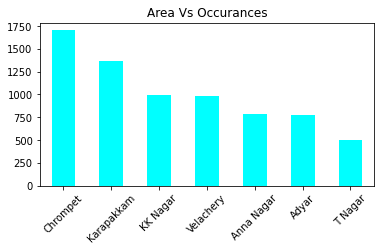

In [37]:
plt.figure(figsize=(6,3))
plt.title("Area Vs Occurances")
df.AREA.value_counts().plot(kind='bar',color="cyan")
plt.xticks(rotation=45)
plt.show()

No of Occurances in SALE_COND Column

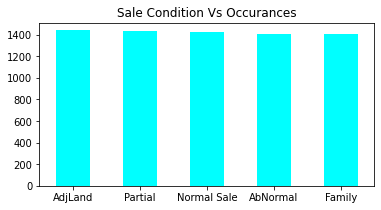

In [38]:
plt.figure(figsize=(6,3))
plt.title("Sale Condition Vs Occurances")
df.SALE_COND.value_counts().plot(kind='bar',color="cyan")
plt.xticks(rotation=0)
plt.show()

No of Occurances in PARK_FACIL Column

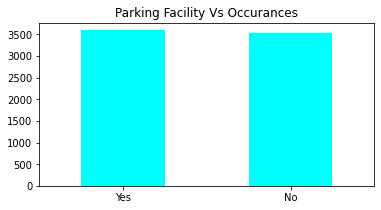

In [39]:
plt.figure(figsize=(6,3))
plt.title("Parking Facility Vs Occurances")
df.PARK_FACIL.value_counts().plot(kind='bar',color="cyan")
plt.xticks(rotation=0)
plt.show()

No of Occurances in BUILDTYPE Column

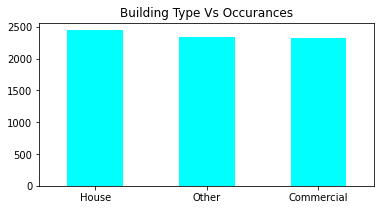

In [40]:
plt.figure(figsize=(6,3))
plt.title("Building Type Vs Occurances")
df.BUILDTYPE.value_counts().plot(kind='bar',color="cyan")
plt.xticks(rotation=0)
plt.show()

No of Occurances in UTILITY_AVAIL Column

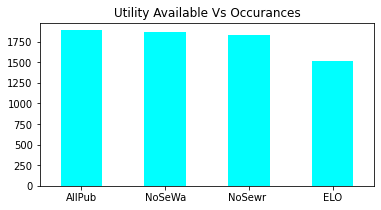

In [41]:
plt.figure(figsize=(6,3))
plt.title("Utility Available Vs Occurances")
df.UTILITY_AVAIL.value_counts().plot(kind='bar',color="cyan")
plt.xticks(rotation=0)
plt.show()

No of Occurances in STREET Column

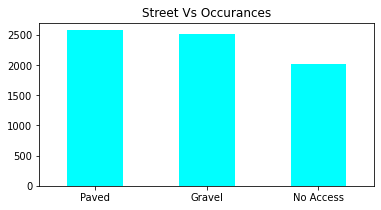

In [42]:
plt.figure(figsize=(6,3))
plt.title("Street Vs Occurances")
df.STREET.value_counts().plot(kind='bar',color="cyan")
plt.xticks(rotation=0)
plt.show()

No of Occurances in MZZONE Column

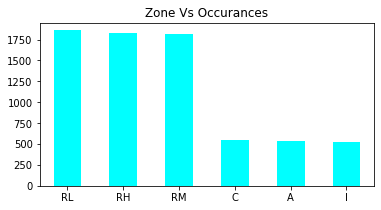

In [43]:
plt.figure(figsize=(6,3))
plt.title("Zone Vs Occurances")
df.MZZONE.value_counts().plot(kind='bar',color="cyan")
plt.xticks(rotation=0)
plt.show()

#Plotting the relationship between Categorical Feature data's vs Target data

In [44]:
catdata = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(catdata))

Number of Categorical features:  7


In [45]:
catdata

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

Arranging the Area column with respect to Sales Price and plotting the data

In [46]:
result=df.groupby(["AREA"])['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")

Plotting the relation between AREA and Sales Price



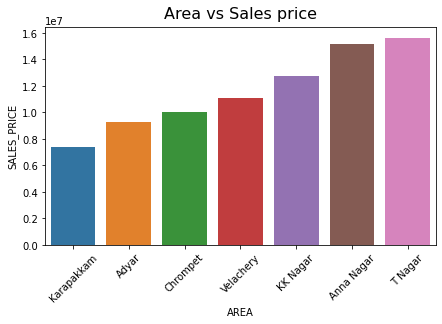

In [47]:
plt.figure(figsize=(7,4))
plt.title("Area vs Sales price", fontsize=16, va='bottom')
br1=sns.barplot(x='AREA',y="SALES_PRICE", data=result)
plt.xticks(rotation=45)
plt.show()

From the above Graph,


*   There is a Linear relationship between AREA(Feature) and Sales price(Target)
*   We will go for label encoding for AREA column
*   Karapakkam has least value and T Nagr has the highest value.



Plotting the relation between Sale Condition and Sales Price

In [48]:
result=df.groupby(["SALE_COND"])['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")

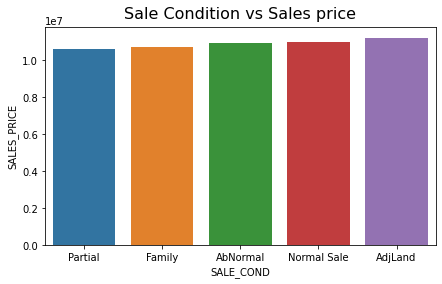

In [49]:
plt.figure(figsize=(7,4))
plt.title("Sale Condition vs Sales price", fontsize=16, va='bottom')
br1=sns.barplot(x='SALE_COND',y="SALES_PRICE", data=result)
plt.xticks(rotation=0)
plt.show()

From the above Graph,

*   Houses that had adjoining land were sold for a higher price
*   Partial had the lowest price
*   We will go for label encoding for SALE_COND column





Plotting the relation between Park Facility and Sales Price





In [50]:
result=df.groupby(["PARK_FACIL"])['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")

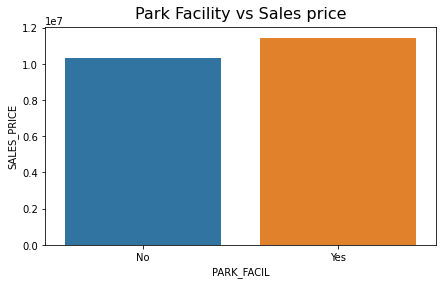

In [51]:
plt.figure(figsize=(7,4))
plt.title("Park Facility vs Sales price", fontsize=16, va='bottom')
br1=sns.barplot(x='PARK_FACIL',y="SALES_PRICE", data=result)
plt.xticks(rotation=0)
plt.show()

From the above Graph,
*   Houses with parking facilities has higher sale price
*We will go for One hot encoding for PARK_FACIL column



Plotting the relation between Build type and Sales Price

In [52]:
result=df.groupby(["BUILDTYPE"])['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")

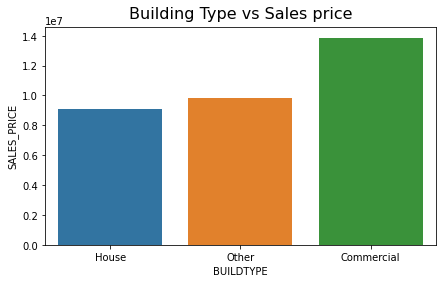

In [53]:
plt.figure(figsize=(7,4))
plt.title("Building Type vs Sales price", fontsize=16, va='bottom')
br1=sns.barplot(x='BUILDTYPE',y="SALES_PRICE", data=result)
plt.xticks(rotation=0)
plt.show()

From the above Graph,
*  Commercial type houses has higher sale price  
*  Normal house type has lower sale price
*We will go for label encoding for BUILDTYPE column



Plotting the relation between Utility Available and Sales Price

In [54]:
result=df.groupby(["UTILITY_AVAIL"])['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")

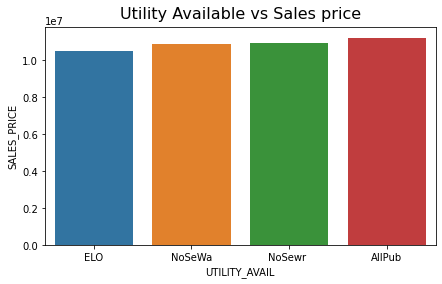

In [55]:
plt.figure(figsize=(7,4))
plt.title("Utility Available vs Sales price", fontsize=16, va='bottom')
br1=sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE", data=result)
plt.xticks(rotation=0)
plt.show()

From the above Graph,

*   Houses that has AllPub access has a higher sale price.
*We will go for label encoding for UTILITY_AVAIL column




Plotting the relation between Type of Street and Sales Price

In [56]:
result=df.groupby(["STREET"])['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")

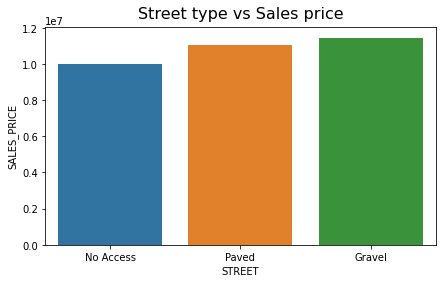

In [57]:
plt.figure(figsize=(7,4))
plt.title("Street type vs Sales price", fontsize=16, va='bottom')
br1=sns.barplot(x='STREET',y="SALES_PRICE", data=result)
plt.xticks(rotation=0)
plt.show()

From the above Graph,
*   Gravelled streets has a higher sale price
*   No Access streets has lower sale price
*We will go for label encoding for STREET column



Plotting the relation between Zone and Sales Price

In [58]:
result=df.groupby(["MZZONE"])['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")

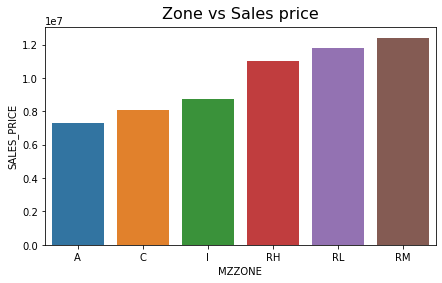

In [59]:
plt.figure(figsize=(7,4))
plt.title("Zone vs Sales price", fontsize=16, va='bottom')
br1=sns.barplot(x='MZZONE',y="SALES_PRICE", data=result)
plt.xticks(rotation=0)
plt.show()

From the above Graph,
*   Zone RM has high sales price
*   Zone A has the lowest sales price
*We will go for label encoding for MZZONE column





#Plotting the distribution of Numerical data's

In [60]:
numdata = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numdata))

Number of Numerical features:  11


In [61]:
numdata

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'BUILDING_AGE'],
      dtype='object')

<Figure size 504x288 with 0 Axes>

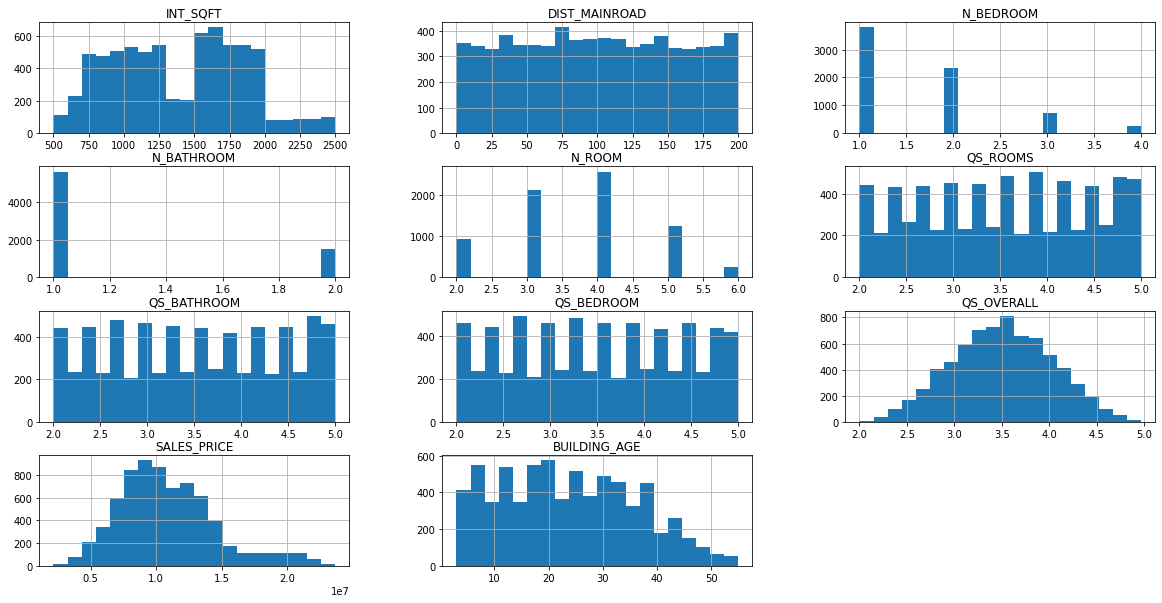

In [62]:
plt.figure(figsize=(7,4))
df[numdata].hist(bins=20, figsize=(20, 10))
plt.xticks(rotation=25)
plt.show()

The above Histograms show the distribution of each Numerical Feature

#Analysing the relation between Numerical Features and the Target Feature

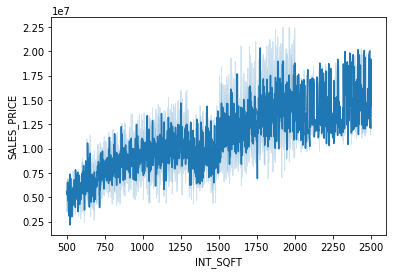

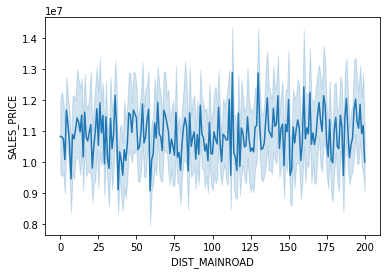

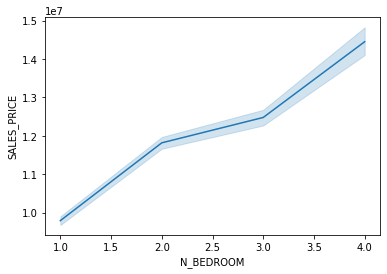

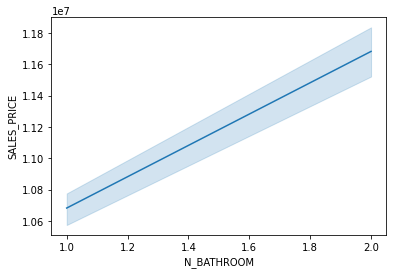

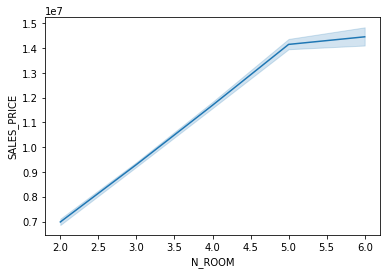

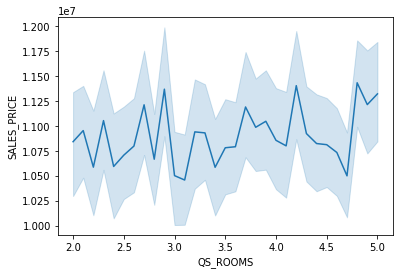

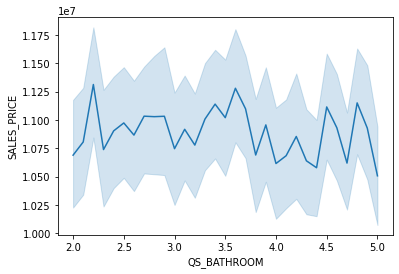

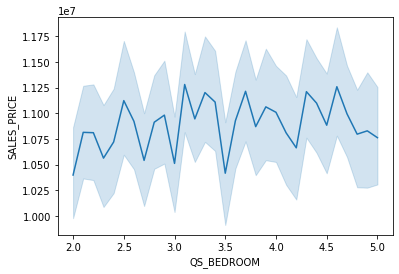

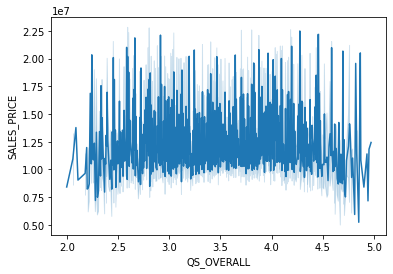

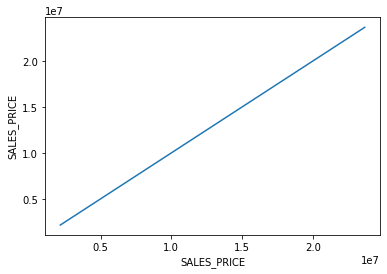

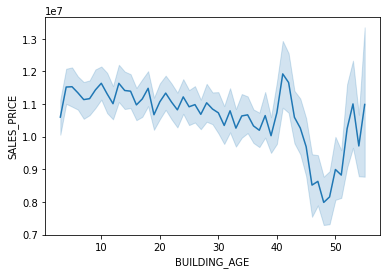

In [63]:
for i in df[numdata]:
  sns.lineplot(x= df[i], y= df['SALES_PRICE'],data = df)
  plt.show()

From the above Graph,
*   There is a linear relationship between Interior SQFT and No of Bathrooms,Bedroom  and total rooms
*   Other features doesnot show any linear relationship

#Applying One hot Encoding to categorical Variables

In [64]:
df1=df
catdata1 = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(catdata1))

Number of Categorical features:  7


In [65]:
df1 = pd.get_dummies(df,drop_first=True)
df1.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,7600000,...,0,0,0,0,1,0,0,0,0,0
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,21717770,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,13159200,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,9630290,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,7406250,...,0,0,0,0,0,1,0,0,0,0


In [66]:
df1.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013989,0.612125,...,-0.089793,0.025290,0.030922,-0.113160,0.060426,-0.084035,-0.078290,0.033044,0.067795,0.053017
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.018783,...,0.012707,-0.014840,0.011974,-0.009223,0.014090,-0.008996,0.009730,0.007454,0.008959,-0.007888
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014245,0.330987,...,-0.111240,0.031149,0.038896,-0.140196,0.069205,-0.017259,-0.014333,-0.010636,0.040104,0.013931
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007961,0.108834,...,-0.071477,0.021273,0.031606,-0.078364,0.028509,0.052443,0.060573,-0.032484,-0.012477,-0.023799
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015418,0.602760,...,-0.083528,0.021138,0.033587,-0.105984,0.049886,-0.091341,-0.087920,0.026932,0.084320,0.060642
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516147,0.021967,...,-0.018183,0.005090,0.010696,-0.011349,0.017089,-0.008152,0.007917,0.012162,-0.012083,0.003202
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.011377,...,0.015155,0.002258,-0.004176,-0.011821,0.016293,0.008982,0.010363,0.003302,-0.025412,0.003103
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628168,0.018804,...,-0.021965,0.003134,0.015301,-0.016548,-0.008378,-0.012115,-0.018541,-0.003892,0.011552,0.001457
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.516147,0.549056,0.628168,1.000000,0.020485,...,-0.014539,0.009898,0.007248,-0.021478,0.015434,-0.006012,-0.011881,0.008581,-0.012439,0.004641
SALES_PRICE,0.612125,0.018783,0.330987,0.108834,0.602760,0.021967,-0.011377,0.018804,0.020485,1.000000,...,-0.058934,-0.000290,0.004818,-0.149341,0.032493,-0.218441,-0.161581,0.022598,0.137466,0.235134


In [67]:
df1.corr()['SALES_PRICE']

INT_SQFT                 0.612125
DIST_MAINROAD            0.018783
N_BEDROOM                0.330987
N_BATHROOM               0.108834
N_ROOM                   0.602760
QS_ROOMS                 0.021967
QS_BATHROOM             -0.011377
QS_BEDROOM               0.018804
QS_OVERALL               0.020485
SALES_PRICE              1.000000
BUILDING_AGE            -0.119192
AREA_Anna Nagar          0.400390
AREA_Chrompet           -0.131183
AREA_KK Nagar            0.193062
AREA_Karapakkam         -0.460068
AREA_T Nagar             0.343654
AREA_Velachery           0.016186
SALE_COND_AdjLand        0.042032
SALE_COND_Family        -0.020856
SALE_COND_Normal Sale    0.013178
SALE_COND_Partial       -0.037140
PARK_FACIL_Yes           0.146428
BUILDTYPE_House         -0.344982
BUILDTYPE_Other         -0.201783
UTILITY_AVAIL_ELO       -0.058934
UTILITY_AVAIL_NoSeWa    -0.000290
UTILITY_AVAIL_NoSewr     0.004818
STREET_No Access        -0.149341
STREET_Paved             0.032493
MZZONE_C      

In [68]:
df1.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE              1.000000
INT_SQFT                 0.612125
N_ROOM                   0.602760
AREA_Anna Nagar          0.400390
AREA_T Nagar             0.343654
N_BEDROOM                0.330987
MZZONE_RM                0.235134
AREA_KK Nagar            0.193062
PARK_FACIL_Yes           0.146428
MZZONE_RL                0.137466
N_BATHROOM               0.108834
SALE_COND_AdjLand        0.042032
STREET_Paved             0.032493
MZZONE_RH                0.022598
QS_ROOMS                 0.021967
QS_OVERALL               0.020485
QS_BEDROOM               0.018804
DIST_MAINROAD            0.018783
AREA_Velachery           0.016186
SALE_COND_Normal Sale    0.013178
UTILITY_AVAIL_NoSewr     0.004818
UTILITY_AVAIL_NoSeWa    -0.000290
QS_BATHROOM             -0.011377
SALE_COND_Family        -0.020856
SALE_COND_Partial       -0.037140
UTILITY_AVAIL_ELO       -0.058934
BUILDING_AGE            -0.119192
AREA_Chrompet           -0.131183
STREET_No Access        -0.149341
MZZONE_I      

From the above observations we can say that INT_SQFT, N_ROOMS and AREA decides the SALES_PRICE.

#Model Creation


Linear Regression Model

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
x = df1.drop('SALES_PRICE',axis=1)
y = df1.SALES_PRICE

Splitting the dataset into 30% test data and remaining 70% for training the model.

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Scaling the data.

In [72]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

Fitting the model

In [73]:
regressor = LinearRegression()
model = regressor.fit(x_train_scaled, y_train)

In [74]:
y_pred = regressor.predict(x_test_scaled) 
y_pred

array([13833227.77193033, 12992010.09134933, 18293672.97399795, ...,
       14831662.50249283,  8469669.56703375,  4862144.30288488])

In [75]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
3913,13376150,1.383323e+07
2726,12857440,1.299201e+07
6220,19124310,1.829367e+07
2716,4905000,4.050538e+06
5459,13534450,1.361377e+07
...,...,...
549,7511125,7.022912e+06
6275,9414770,9.187187e+06
6772,13614160,1.483166e+07
2861,8415125,8.469670e+06


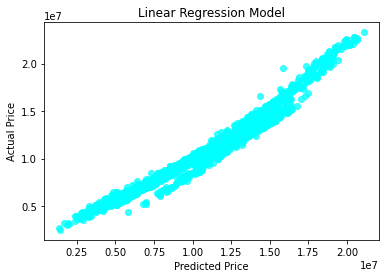

In [76]:
plt.scatter(y_pred,y_test,alpha=0.75,color='cyan')
plt.title('Linear Regression Model')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

In [77]:
from sklearn import metrics 
print('R2-SCORE:', metrics.r2_score(y_test,y_pred)) 

R2-SCORE: 0.9567524868183815


Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
random = RandomForestRegressor(n_estimators=400).fit(x_train_scaled,y_train)
rf_pred = random.predict(x_test_scaled)
rf_reg_score = random.score(x_test_scaled,y_test)
rf_reg_score

0.9733856831455724

XG Boost regressor Model

In [80]:
from xgboost import XGBRegressor

In [81]:
xx = XGBRegressor().fit(x_train_scaled,y_train)
xgb_reg_pred = xx.predict(x_test_scaled)
xgb_score = xx.score(x_test_scaled,y_test)
xgb_score

[02:54:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9791979828493036

#Feature Selection

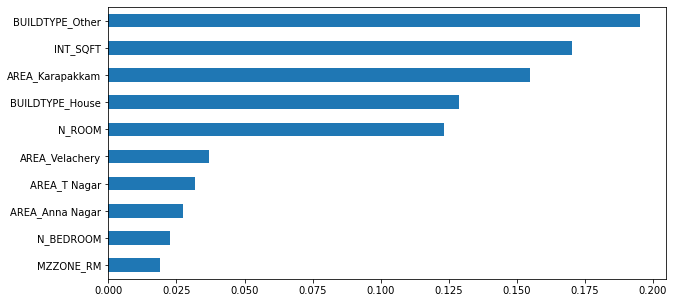

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train_scaled,y_train)
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))

From the above observation we can conclude that BUILDTYPE, INT_SQFT, N_ROOMS and AREA decides the Sales Price.



#Conclusion

The Scores obtained by different regressor models are


*   Linear regression model is around 95.67%
*   Random Forest model is around 97.34%
* XGB regressor model is around 97.91%

So from the above inferences we can say that XGB Regressor is the suitable model for this dataset.



